# Pymaceuticals Inc.
---

### Analysis

- Among all groups, drug regimen'Campomulin' and 'Ramicane' have  the highest number of mice/timepoints being selected for oberservation
- The distribution of male and female mice are similar with male mice ~ 2% higher.
- There is an outlier for the final tumor volume within the group treated by Infubinal, the group mean is ~ 60 (mm3) while one mouse's final volume is: 36.321346 (mm3).  
- For Campomulin treatment groups,  the mice tumor volume reduced with the time pass,however, the volume increased after timepoint 35.
- Across all treatment groups, tumor size/volume is positively related with mouse weight, the positive corelation coefficient is 0.84 which suggests the two variables are highly positively correlated.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(study_results,mouse_metadata,how='left')
merge_df.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_num=len(merge_df['Mouse ID'].unique())
mice_num

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice['Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data=merge_df.loc[merge_df['Mouse ID']=='g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df.drop(duplicate_mouse_data.index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std=merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM=(merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.concat([mean,median,variance,std,SEM],axis=1)
summary_df.columns=['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev','Tumor Volume Std. Err.']
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed  Mouse Timepoints'>

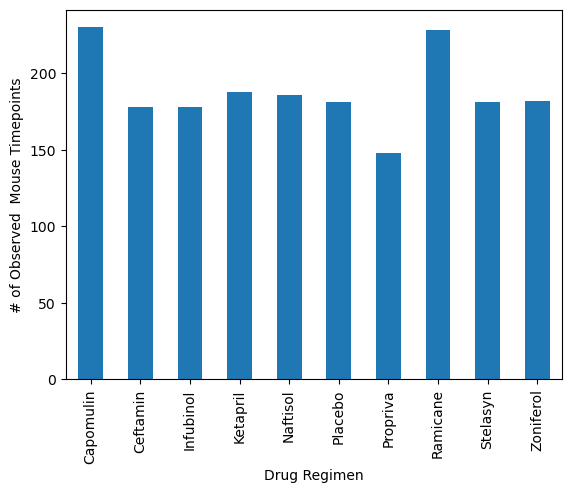

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_df=clean_df.groupby('Drug Regimen')['Timepoint'].count()
bar_plot_df.plot(kind='bar',ylabel='# of Observed  Mouse Timepoints')

Text(0, 0.5, '# of Observed  Mouse Timepoints')

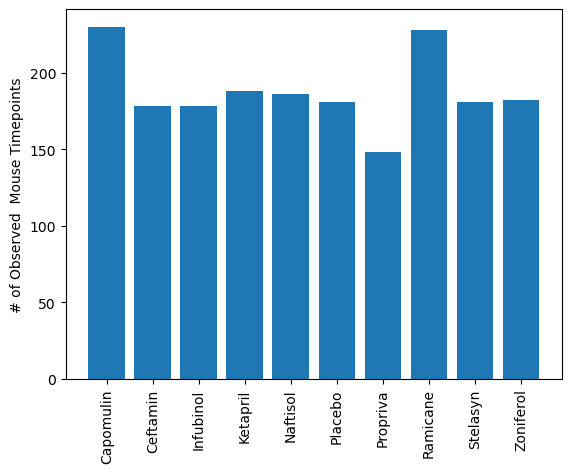

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#create barchart dataframe 
import numpy as np
bar_chart_df=clean_df.groupby('Drug Regimen')['Mouse ID'].count()

#define x_value
x_axis=np.arange(0,len(bar_chart_df.index))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_chart_df.index,rotation='vertical')

#plot
plt.bar(x_axis,bar_chart_df)
plt.ylabel('# of Observed  Mouse Timepoints')

<Axes: ylabel='count'>

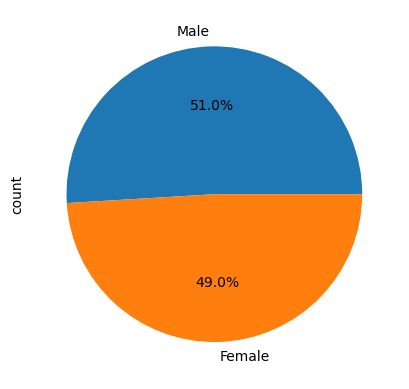

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df=clean_df['Sex'].value_counts()
pie_df.plot(kind='pie',autopct="%1.1f%%")

Text(0, 0.5, 'count')

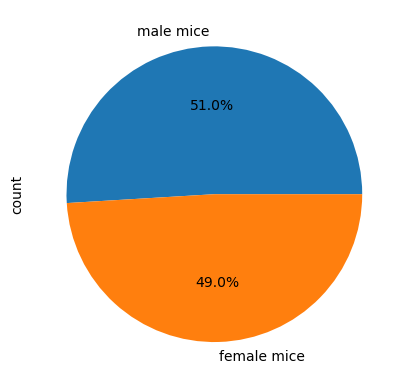

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_num=len(clean_df.loc[clean_df['Sex']=='Female'])
male_num=len(clean_df.loc[clean_df['Sex']=='Male'])
sex_distribution=[male_num,female_num]
labels=['male mice','female mice']
plt.pie(sex_distribution,labels=labels,autopct="%1.1f%%")
plt.ylabel('count')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
new_df=greatest_timepoint.reset_index(['Mouse ID'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tumor_vol=new_df.merge(clean_df,on=['Mouse ID','Timepoint'],how='inner')
greatest_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# get drug volume for each treatment 
for drug in treatments:
    drug_vol=greatest_tumor_vol.loc[greatest_tumor_vol['Drug Regimen']==drug,['Tumor Volume (mm3)']]['Tumor Volume (mm3)'].tolist() 
    tumor_vol_data.append(drug_vol)
tumor_vol_data_df=(pd.DataFrame(tumor_vol_data)).transpose()
tumor_vol_data_df.columns=treatments

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments: 
    quartiles=tumor_vol_data_df[drug].quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=tumor_vol_data_df.loc[(tumor_vol_data_df[drug]>upper_bound)|(tumor_vol_data_df[drug]<lower_bound),[drug]]
    print(f'{drug} potential outlier is: {outliers}')

    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin potential outlier is: Empty DataFrame
Columns: [Capomulin]
Index: []
Ramicane potential outlier is: Empty DataFrame
Columns: [Ramicane]
Index: []
Infubinol potential outlier is:    Infubinol
5  36.321346
Ceftamin potential outlier is: Empty DataFrame
Columns: [Ceftamin]
Index: []


<Axes: ylabel='Tumor Volume (mm3)'>

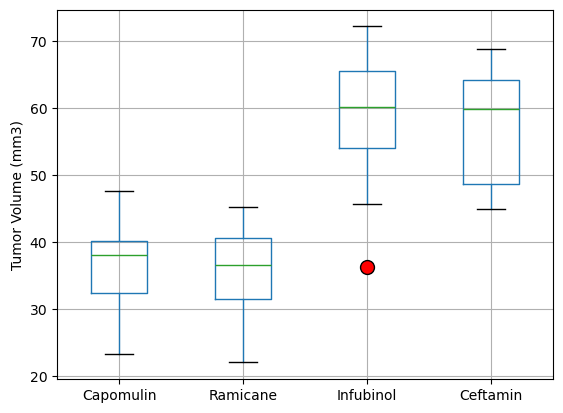

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops= dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
tumor_vol_data_df.boxplot(ylabel='Tumor Volume (mm3)',flierprops=flierprops)

## Line and Scatter Plots

<Axes: title={'center': 'Campomulin treatment of mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

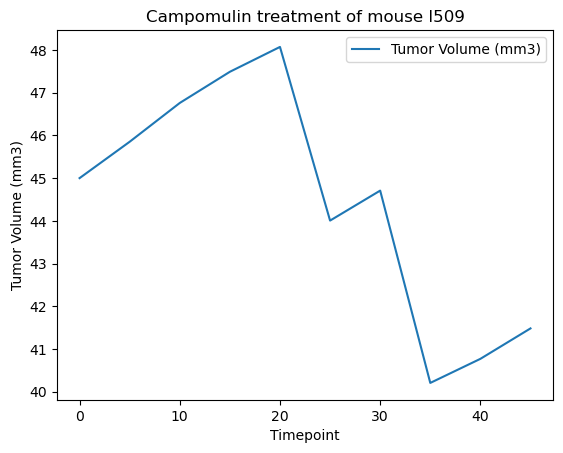

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# mouse_id selected='b128'
Capomulin_df1=clean_df[(clean_df['Drug Regimen']=='Capomulin')&(clean_df['Mouse ID']=='l509')]
Capomulin_df1.plot(x='Timepoint',y='Tumor Volume (mm3)',ylabel='Tumor Volume (mm3)',kind='line',title='Campomulin treatment of mouse l509')

Text(0, 0.5, 'Tomor Volume (mm3)')

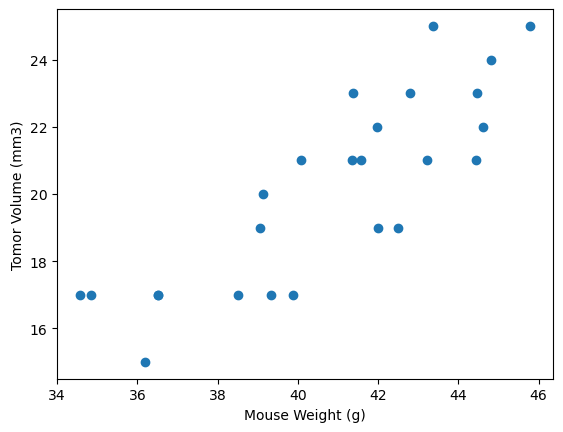

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
Capomulin_df
tumor_volume_mean=Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight_mean = Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(tumor_volume_mean,mouse_weight_mean)
plt.xlabel("Mouse Weight (g)")
plt.ylabel('Tomor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


/var/folders/v_/bwwf47r500n688q26f92ggbw0000gn/T/ipykernel_45930/468465425.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(line_eq,(tumor_volume_mean[-1], regress_values[-1]),fontsize=15,color="red")


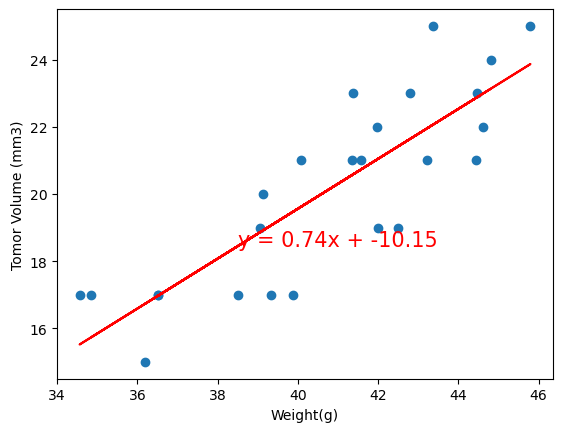

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(tumor_volume_mean,mouse_weight_mean)
x_values=tumor_volume_mean 
y_values=mouse_weight_mean
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(tumor_volume_mean[-1], regress_values[-1]),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Tomor Volume (mm3)')
#calculate correlation coefficient 
cc=st.pearsonr(tumor_volume_mean,mouse_weight_mean)[0]
print(f'The correlation between mouse weight and the average tumor volume is {round(cc,2)}')

#linear regression model 